In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/Modular/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow

In [4]:
path=pathy+'BM_data2022-04-27-12-01-44.h5'
# path=pathy+'AnisotropicSamp_data2022-04-27-12-38-00.h5'
# path=pathy+'Data_novol_data2022-04-27-12-43-36.h5'
# path=pathy+'1000_1500__10_data2022-04-27-13-36-38.h5'
# path=pathy+'1000_1500_5data2022-04-27-13-42-18.h5'
# path=pathy+'1000_1500_15_success_data2022-04-27-13-56-43.h5'
# path=pathy+'data2022-04-27-14-04-59.h5'
df = pd.read_hdf(path)

    



In [5]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,4.511637,0.000747,2.590685,0.013907,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
1,0.000000,1.034,4.421382,0.000719,2.590685,0.013907,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
2,0.000000,2.068,4.341818,0.000694,2.590685,0.013907,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
3,0.000000,3.102,4.273019,0.000670,2.590685,0.013907,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
4,0.000000,4.136,4.221466,0.000648,2.590685,0.013907,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.497871,0.030642,2.401883,1.394176,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
196,0.523599,202.664,5.494809,0.025814,2.401883,1.394176,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
197,0.523599,203.698,5.500429,0.029925,2.401883,1.394176,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
198,0.523599,204.732,5.495709,0.023818,2.401883,1.394176,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34


[1.]


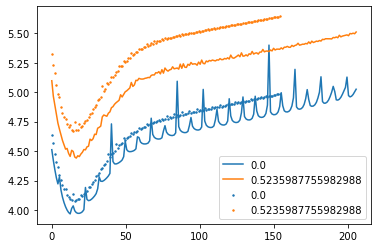

In [38]:
path=pathy+'BM_data2022-04-27-12-01-44.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))

# path=pathy+'data2022-04-27-22-03-52.h5'
  

# df = pd.read_hdf(path)
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     plt.scatter(df2['freq'], df2['SE'], label=str(th))
#     # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     # plt.title('theta='+str(th*180/np.pi))
# plt.legend()
# print(tss)



path=pathy+'data2022-04-27-22-10-22.h5'
  

df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=2)
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
plt.legend()
print(tss)

[1.]


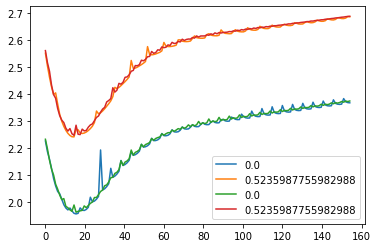

In [150]:
path=pathy+'smaller_W__17_500_data2022-04-27-14-20-51.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
# path=pathy+'1500_1500_15_gettingthere_data2022-04-27-14-04-59.h5'
path=pathy+'smaller_W__17_1500_data2022-04-27-14-28-10.h5'
  

df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
plt.legend()
print(tss)

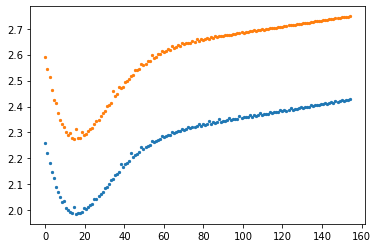

In [154]:
path=pathy+'Smaller_W_radial_data2022-04-27-14-41-02.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=5)
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
# path=pathy+'1500_1500_15_gettingthere_data2022-04-27-14-04-59.h5'
# path=pathy+'smaller_W__17_1500_data2022-04-27-14-28-10.h5'
  

# df = pd.read_hdf(path)
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     plt.plot(df2['freq'], df2['SE'], label=str(th))
#     # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     # plt.title('theta='+str(th*180/np.pi))
# plt.legend()
# print(tss)

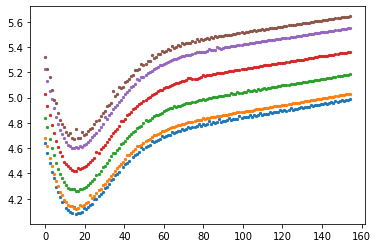

In [39]:
path=pathy+'data2022-04-27-22-42-48.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=5)